__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/10_Create_Random_Data.ipynb)__

# Create Random Data for Testing
* `random_series`: Returns a series of random data of several types, including names, random walks with perlin-noise and errorprone series to test your functions.
* `decorate`: Decorates a series with specials (e.g. NaNs)
* `people` and `random_numbers`: Random data for testing.

In [37]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /home/me/Dropbox
environment['lib_path']     = /home/me/Dropbox/31_Projekte/01_Python/libs
Start Time: 10:43:05


In [38]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import random

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
#pak.Config.set('VERBOSE', True)

# copy_on_write
pd.set_option("mode.copy_on_write", True)

## random_series()

In [39]:
?pak.random_series

Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'time', mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many dec

### Simple

In [40]:
# i f s n c means int float string name choice
size = 100
i = pak.random_series( size, 'i')
f = pak.random_series( size, 'f')
s = pak.random_series( size, 's')
n = pak.random_series( size, 'n')
c = pak.random_series( size, 'c')
t = pak.random_series( size, 't')
df = pak.dataframe( (i, f, s, n, c, t) )
df

,rnd_int,rnd_float,rnd_string,rnd_name,rnd_choice,rnd_time
0,185,0.230,gPJoQUk,Heinz,c,2000-04-11 06:34:35.266267641
1,634,0.740,Ü7nÖk,Anja,d,2021-12-09 20:16:47.652945674
2,211,0.335,EfaN3,Carsten,a,1904-08-17 08:19:18.095894950
3,278,0.180,ÄB45,Nico,b,2017-02-24 18:12:33.514007703
4,273,0.578,b6Su,Theresa,e,1980-05-23 16:17:25.336412077
...,...,...,...,...,...,...
95,642,0.564,68wM,Hannelore,a,1999-07-14 20:57:02.425683532
96,841,0.136,6nPn,Clara,b,2009-11-20 01:40:19.226514374
97,673,0.344,diaf,Isabel,e,1964-03-13 03:26:06.099674961
98,62,0.819,wÜ65,Eric,d,1956-04-09 01:02:00.441282998


In [41]:
#pak.analyse_cols(df)

### Random Numbers

In [42]:
# Several types of random numbers, with parameters
size = 100
i = pak.random_series( size, 'int',        min=-5, max=5,     p_nan=0.1,   p_dup=0    )
f = pak.random_series( size, 'float',      decimals=4,        p_nan=0.1,   p_dup=0    )                       
a = pak.random_series( size, 'ascending'                                              )
d = pak.random_series( size, 'descending'                                             )
p = pak.random_series( size, 'perlin',     freq=[2,1,8,1],                            )

# decorate f with 50% 0-values  
f = f.apply(pak.decorate, special=0, p=0.5)  

df = pak.dataframe( (i,f,a,d,p) )
pak.sample(df)

,rnd_int,rnd_float,rnd_ascending,rnd_descending,rnd_perlin
0,1,0.5822,0.000000,1.000000,0.000000
3,<NA>,0.9996,0.026751,0.981886,0.003642
4,5,NaN,0.041621,0.973412,-0.028082
10,-5,NaN,0.222954,0.865260,-0.084737
56,4,0.0000,0.525840,0.287255,0.748511
81,-3,0.0000,0.868100,0.253302,-1.000000
99,1,0.0000,1.000000,0.000000,-0.042728


<AxesSubplot: >

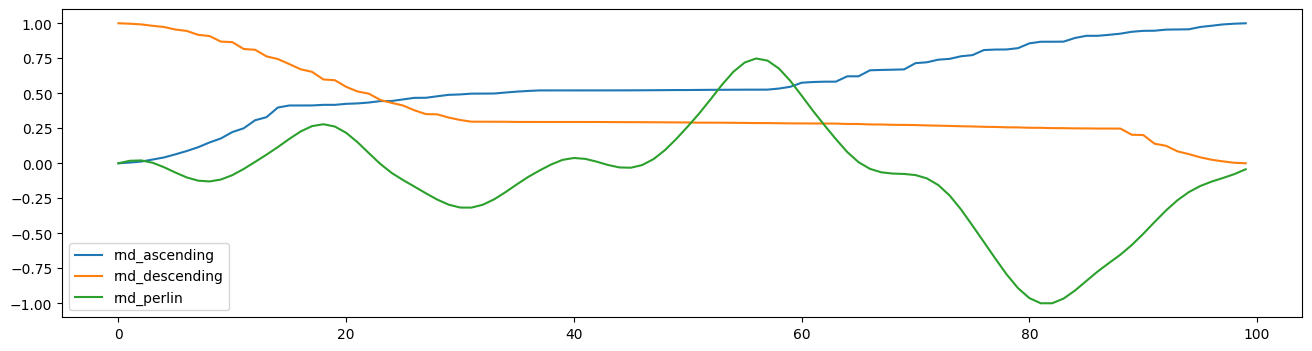

In [43]:
# ascending, descending and perlin are ordered random sequences
%matplotlib inline
spalten = ['rnd_ascending','rnd_descending','rnd_perlin',]
pak.plot(df[spalten])

In [44]:
#pak.analyse_cols(df)

### Strings, names, lists and other types

In [45]:
# Strings, names, lists and other types, with parameters
size = 100
s = pak.random_series( size, 'string', len_min=2, len_max=20,           p_nan=0.2,   p_dup=0    )
n = pak.random_series( size, 'name',                                    p_nan=0.2,   p_dup=0.33 )
c = pak.random_series( size, 'choice', choice=['Bremen','Bremerhaven'], p_nan=0.3,   p_dup=0,    name='rnd_city')
l = pak.random_series( size, 'list',                                    p_nan=0.3,   p_dup=0.5  )
t = pak.random_series( size, 'time',  min='1883-01-01',                 p_nan=0.3,   p_dup=0.5  )
m = pak.random_series( size, 'mix',                                     p_nan=0.1,   p_dup=0    )
df = pak.dataframe( (s, n, c, l, t, m) )
pak.sample(df)

,rnd_string,rnd_name,rnd_city,rnd_list,rnd_time,rnd_mix
0,ISlesdmlaaOä6Pehäe,Ingo,NaN,NaN,1987-08-07 04:09:54.914509442,{0}
1,<NA>,Olaf,Bremen,"[Natalie, Marianne, Rosemarie, Dennis, Klara, ...",NaT,-4211
13,<NA>,<NA>,NaN,"[Tanja, Philipp, Hannes, Jakob, Frieda]",1885-10-26 20:31:03.746473432,Bremerhaven
17,<NA>,Ute,NaN,"[Carl, Maja, Steffen, Tanja]",NaT,-56537
38,UdAQzHC3bJJWuRjU8XCm,Monika,NaN,"[Luis, Anja, Tanja, Oskar, Tanja, Tobias, Luca...",NaT,0.5221
45,<NA>,Aileen,Bremen,NaN,NaT,NaN
49,ömöIooxPTZde,Holger,Bremen,"[Ernst, Dirk, Svenja, Fritz, Jonathan, Markus,...",1980-05-30 10:15:35.482171302,Tom
56,yUuzÄhj1etViaQd0Pö,Arthur,Bremerhaven,"[Andreas, Julia, Christian, Tom, Yvonne]",1885-12-19 22:57:05.304616495,0.6767
74,0coIYyHqNyXcIeuo,<NA>,NaN,"[Henry, Julian, Tom, Sophie, Marion, Rudolph]",NaT,NaN
87,NoBTs3k,<NA>,Bremen,"[Tanja, Eric, Elfriede, Meike, Tom, None]",2023-02-25 19:09:40.492071033,1993-11-22 08:10:42.678626659


### Random progressions
Random progressions are `random_series` with typ `'ascending'`, `'descending'` or `'perlin'`.

In [46]:
# Some random progressions
size = 100
a = pak.random_series( size, random.choice([ 'a','d','p']))
b = pak.random_series( size, random.choice([ 'a','d','p']))
c = pak.random_series( size, random.choice([ 'a','d','p']))
d = pak.random_series( size, random.choice([ 'a','d','p']))
e = pak.random_series( size, random.choice([ 'a','d','p']))
f = pak.random_series( size, random.choice([ 'a','d','p']))
g = pak.random_series( size, random.choice([ 'a','d','p']))
h = pak.random_series( size, random.choice([ 'a','d','p']))
i = pak.random_series( size, random.choice([ 'a','d','p']))
j = pak.random_series( size, random.choice([ 'a','d','p']))
df = pak.dataframe( (a,b,c,d,e,f,g,h,i,j) )
df.head(3)

,A,B,C,D,E,F,G,H,I,J
0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.003320,0.006402,0.001267,0.143984,0.996903,0.996835,0.007642,0.001703,-0.106281,-0.012456
2,0.007141,0.008080,0.007577,0.302260,0.995775,0.992932,0.011558,0.011621,-0.242257,-0.035653


<AxesSubplot: >

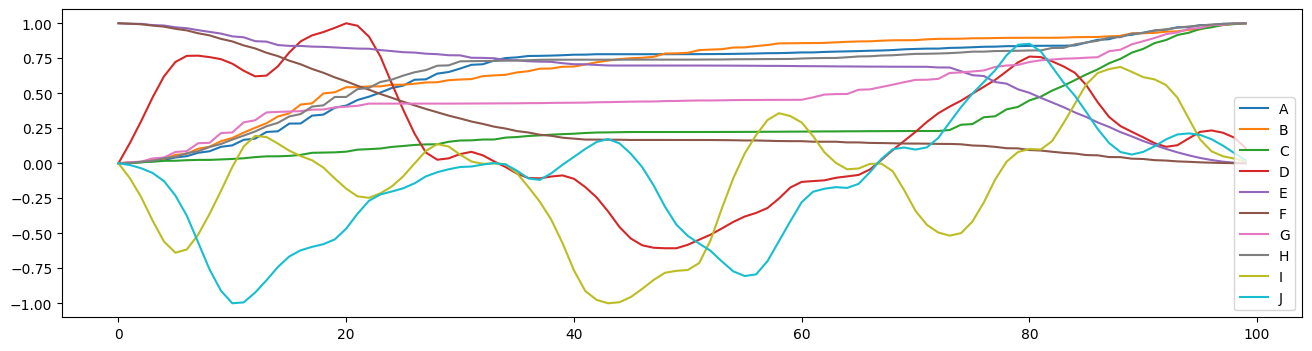

In [47]:
%matplotlib inline
pak.plot(df)

### Random Scaling 
* use scale(), see "Scale Numbers"

min = 0.0010620720302224327
max = 0.01751861277090068


<AxesSubplot: >

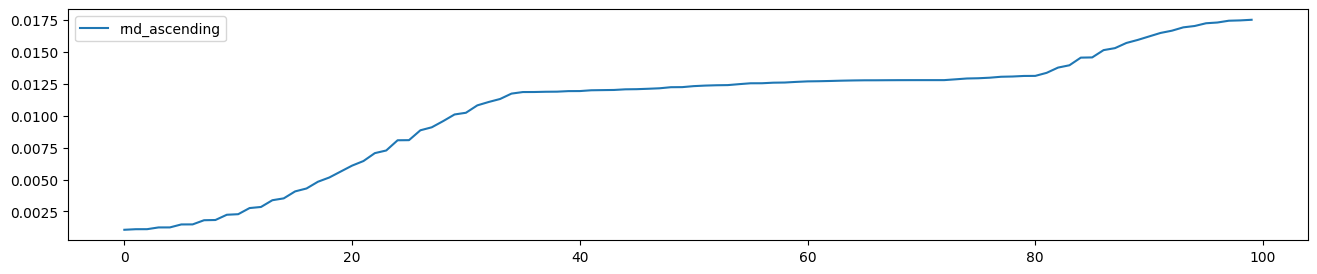

In [48]:
s = pak.random_series(100, 'a') 
s = pak.scale(s, 'random')   

print(  'min =', s.min() )
print(  'max =', s.max() )

%matplotlib inline
pak.plot(s)

### Random Error-prone Series
'errorprone' generates sequences of NaNs, 0, 1 with similar index.
Useful for testing. 

In [49]:
# try this sereral times
pak.random_series( 7, 'errorprone')  

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: rnd_errorprone_0, dtype: int64

## random_perlin()
You can access random perlin noise by the function `random_series` with `typ='perlin'`
of by the function `random_perlin`.

In [50]:
?pak.random_perlin

Signature: pak.random_perlin(shape=(100, 5), freq=[3, 6, 12, 24], op='add')
Docstring:
Returns a Dataframe with Perlin Noise:
- Every column looks like a random walk.
- The columns correlate (the noise is 2-dim)
* shape: The shape of the result
* freq:  Up to 4 frequencies for the random walk.
         The frequencies are added or multipied with descending factors 1, 1/2, 1/4 and 1/16.
         A frequency of 1 means 1 maximum and 1 minimum.
         A frequency of 2 means 2 maxima  and 2 minima.                
         A frequency of 0 means, that nothing is added for the corresponding factor.
         E.g. freq=[1,0,0,100] gives a very low-frequency random walk 
         with a very slight admixture of high-frequency components. 
* op:    'add' or 'mult', how the frequencies are linked together
            
File:      ~/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function

In [51]:
# default perlin
df = pak.random_perlin( shape=(100,15) )
df.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,0.000000,0.088342,0.108379,-0.067696,-0.239090,0.000000,0.282690,0.351001,0.459170,0.227424,0.000000,-0.141163,-0.087909,-0.137782,-0.023906
1,0.009131,0.122664,0.117015,-0.045112,-0.246697,-0.001306,0.288956,0.343435,0.450819,0.247644,0.028219,-0.140566,-0.113485,-0.161949,-0.036256
2,0.020166,0.158059,0.125630,-0.029834,-0.254126,0.005261,0.300460,0.337739,0.448806,0.279253,0.064568,-0.132299,-0.137071,-0.172325,-0.042405
3,0.044879,0.185564,0.129861,-0.036422,-0.261478,0.006384,0.302964,0.343714,0.451117,0.315955,0.106155,-0.118858,-0.162380,-0.175528,-0.044348
4,0.076861,0.197472,0.116775,-0.053952,-0.265547,0.000147,0.277296,0.348152,0.442309,0.348251,0.136946,-0.110288,-0.196614,-0.179787,-0.044570


<AxesSubplot: >

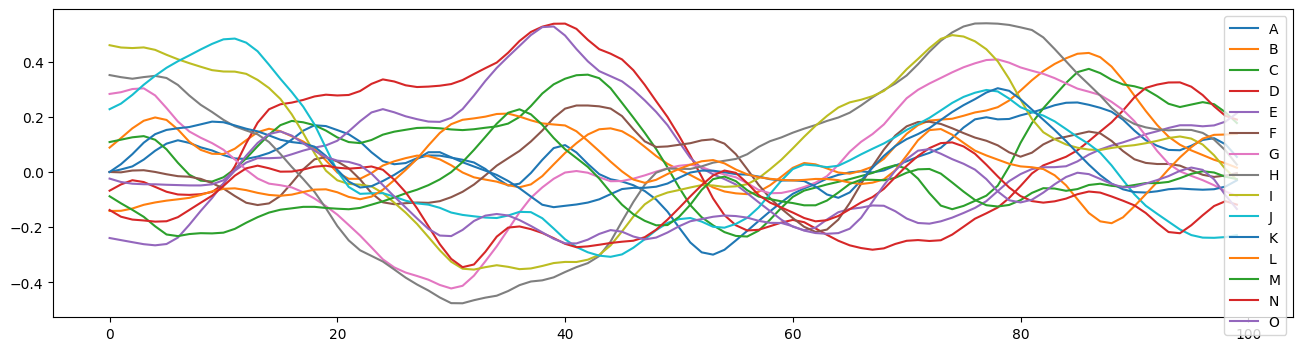

In [52]:
%matplotlib inline
pak.plot(df)

<AxesSubplot: >

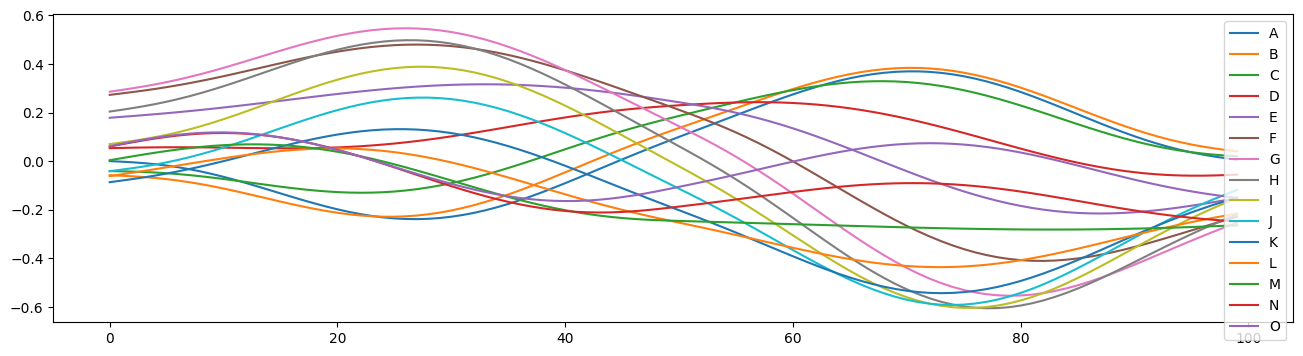

In [53]:
# freq 2 means: 2 minima and 2 maxima
df = pak.random_perlin( shape=(100,15), freq=2 )
pak.plot(df)

<AxesSubplot: >

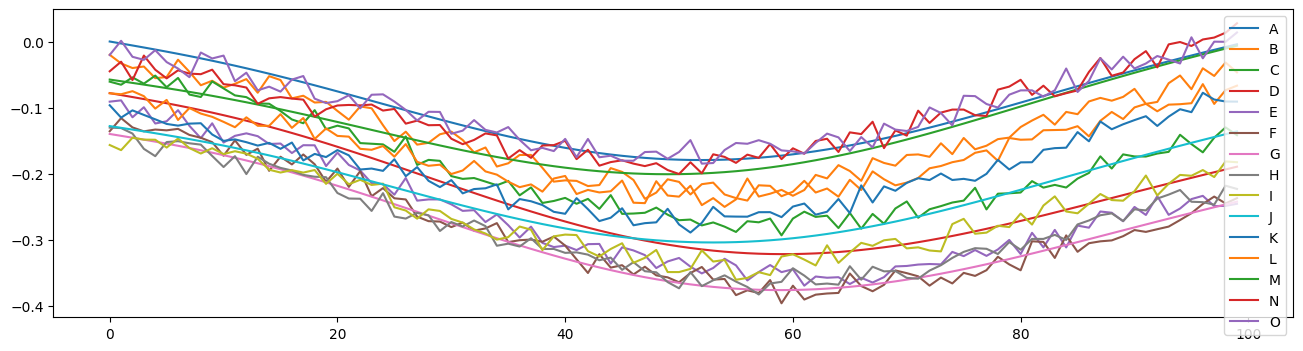

In [54]:
# freq 1 added to a little bit freq 100
df = pak.random_perlin( shape=(100,15), freq=[1,0,0,100] )
pak.plot(df)

<AxesSubplot: >

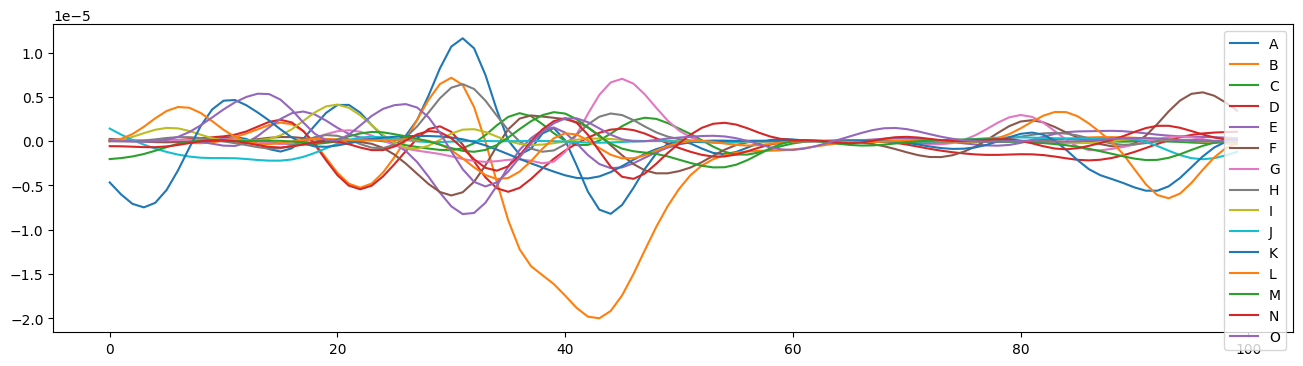

In [55]:
df = pak.random_perlin( shape=(100,15), freq=[1,1,4,8], op='mult')
pak.plot(df)

## decorate()

In [56]:
?pak.decorate

Signature: pak.decorate(skalar, p=0.2, special=nan)
Docstring:
Decorates a series with specials (e.g. NaNs), is applied with apply
e.g. result = result.apply(decorate, p=0.1)               # decorate with 10% nan  
e.g. result = result.apply(decorate, p=0.1, special='a')  # decorate with 10% 'a'.              
File:      ~/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function

In [57]:
df = pak.dataframe( [ list('Babykorb'), 
                      list('abfällig'), 
                      list('Abgründe'), 
                      list('Kätzchen'), 
                      list('Landwirt'), 
                      list('lebendig'), 
                      list('Saugrohr'),       
                      list('Trugbild'),                     
                ] )
df['B'] = df.B.apply( pak.decorate, p=0.2, special='😀')
df['H'] = df.H.apply( pak.decorate, p=0.2)
df

,A,B,C,D,E,F,G,H
0,B,a,b,y,k,o,r,b
1,a,b,f,ä,l,l,i,NaN
2,A,b,g,r,ü,n,d,NaN
3,K,ä,t,z,c,h,e,n
4,L,😀,n,d,w,i,r,t
5,l,e,b,e,n,d,i,g
6,S,a,u,g,r,o,h,r
7,T,r,u,g,b,i,l,d


## people(): Easy Random Data

In [58]:
?pak.people

Signature: pak.people(size=100)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      ~/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function

In [59]:
# Test data
df = pak.people()
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Richard,39,30,72247,Berlin,eBk5akQza,"{x, 0, p}","[A, C, C, B]"
1,Mohammed,30,30,78102,Bremen,V57gQyu,{Y},"[A, A, A]"
3,Clara,41,40,<NA>,<NA>,leexKQniG,{y},"[a, b, c]"
5,Jörg,28,20,10843,<NA>,PbXwcV,"{Q, d, E, t, U}",[]
15,Alexandra,26,20,29359,Bremen,j6PJXi,"{M, 5, T, 2}","[A, B, C, C]"
23,Herta,31,30,26455,Berlin,oLegüaMnX,"{4, x, R, K, G}","[A, A, A]"
28,Yvonne,37,30,28702,Berlin,RYCNmtHSX,"{T, D, h, 0, w}","[A, B, C, C]"
68,Heike,37,30,30425,Bremen,1uÜxFuJ,{H},"[A, C, C, B]"
74,Nicolas,29,20,10843,<NA>,FJPÖuU,"{4, J, S, v, k}",[]
83,Sarah,31,30,62891,<NA>,ööt4eÄEe5,{q},"[A, x]"


In [60]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_datetime,is_hashable,nan_allowed,...,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int8,True,False,False,True,False,...,1,100,0,0,100,0.0,49.50,49.5,99.0,4950.0
1,first_name,str,pd.string,string,,False,True,False,True,True,...,1,70,0,30,100,Alexandra,NaN,NaN,Yvonne,NaN
2,age,int8,pd.Int8,Int8,,True,False,False,True,True,...,1,20,0,80,100,22.0,32.37,32.0,41.0,3237.0
3,age_class,int8,pd.Int8,Int8,,True,False,False,True,True,...,1,3,0,97,100,20.0,28.60,30.0,40.0,2860.0
4,postal_code,int32,pd.Int32,Int32,,True,False,False,True,True,...,1,68,4,28,100,10843.0,49999.46,49498.0,99861.0,4799948.0
5,birthplace,str,pd.string,string,,False,True,False,True,True,...,1,2,35,63,100,Berlin,NaN,NaN,Bremen,NaN
6,secret,str,pd.string,string,,False,True,False,True,True,...,1,100,0,0,100,1uÜxFuJ,NaN,NaN,ööt4eÄEe5,NaN
7,features,set,object,object,,False,True,False,False,True,...,1,80,0,20,100,{},NaN,NaN,"{v, l, y}",NaN
8,history,list,object,object,,False,True,False,False,True,...,1,9,0,91,100,[],NaN,NaN,"[c, b, a]",NaN


## random_numbers()

In [61]:
?pak.random_numbers

Signature: pak.random_numbers(size=1000)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      ~/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function

In [62]:
# Test data
df = pak.random_numbers()
pak.sample(df)

,A,B,C,D,E
0,28,52352,0.077,8.04,0.000000
34,20,96961,0.823,3.65,0.039619
53,42,92318,0.657,1.82,0.093922
214,25,11604,0.512,9.99,0.194832
252,38,43819,0.298,3.27,0.210944
299,31,99997,0.421,7.66,0.238954
302,34,10585,0.961,7.64,0.241092
337,30,39296,0.943,6.89,0.262193
428,32,30824,0.000,2.69,0.279056
570,29,44886,0.254,0.26,0.334031


In [63]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_datetime,is_hashable,nan_allowed,...,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int16,True,False,False,True,False,...,1,1000,0,0,1000,0.0,499.50,499.50,999.00,499500.00
1,A,int8,pd.Int8,Int8,,True,False,False,True,True,...,1,23,0,977,1000,20.0,30.95,31.00,42.00,30950.00
2,B,int32,pd.Int32,Int32,,True,False,False,True,True,...,1,700,0,300,1000,10585.0,55488.40,55260.50,99997.00,55488396.00
3,C,float32,np.float32,float32,,True,False,False,True,True,...,1,700,0,300,1000,0.0,0.50,0.49,1.00,499.35
4,D,float32,np.float32,float32,,True,False,False,True,True,...,1,700,0,300,1000,0.0,5.02,4.92,9.99,5019.50
5,E,float32,np.float32,float32,,True,False,False,True,True,...,1,999,0,1,1000,0.0,0.35,0.31,1.00,349.97


<AxesSubplot: >

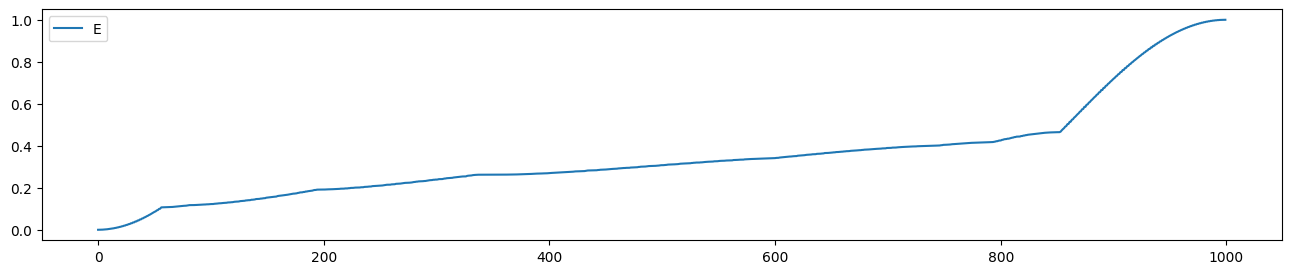

In [64]:
pak.plot(df.E)